# 43008: Reinforcement Learning

## Week 2 Part B: Define Online Ad Optimization as Multi-Arm Bandit problem (Solution):
* Epsilon Greedy
* Upper Confidence Bound (UCB)

### What you will learn?
1. Create/Setup Multi-Arm Bandit Environment
2. Develop Epsilon-Greedy Algorithm
3. Develop Upper Confidence Bound (UCB) Algorithm
4. Compare both Algorithms

## In this notebook, you will:
1. Understand the CTR problem in depth.
2. Create a bandit simulation for the advertising problem.
3. Implement and compare the Epsilon-Greedy and Upper Confidence Bound (UCB) algorithms.


# Multi-Arm Bandit for Online Advertising

## **Case Study: Online Advertising Optimization at WebAds Inc.**

**Background:**
WebAds Inc. is a leading online advertising platform that hosts ads for a plethora of advertisers. They serve ads on a variety of websites and have a diverse user base. Their primary metric of success is the Click-Through Rate (CTR), which indicates how often users click on an ad when it's presented to them.

**Challenge:**
Each advertiser provides multiple ad creatives (images, videos, etc.) to WebAds Inc. for display. However, WebAds Inc. doesn't know in advance which ad creative will perform best in terms of CTR. They need to figure out the optimal ad creative to display to maximize user engagement and, consequently, their revenue.

**Constraints:**

1. **Unknown CTR:** WebAds Inc. does not have prior knowledge about the CTR of any ad creative.
2. **Dynamic Environment:** Users' preferences might change over time, and so might the performance of the ads.
3. **Finite Budget:** Advertisers provide a budget for their ads. WebAds Inc. can't just keep displaying an ad indefinitely.

**Objectives:**

1. **Maximize CTR:** The primary objective is to maximize the CTR, ensuring that the ads are relevant and engaging to the users.
2. **Balance Exploration and Exploitation:** WebAds Inc. needs to explore the performance of various ads while also exploiting the best-performing ones.

**Operational Details:**

- WebAds Inc. hosts ads for numerous advertisers. For simplicity, let's consider they're currently testing 10 different ads from a single advertiser.
- Each of these ads has an inherent, but unknown, CTR.
- When a user visits a website, WebAds Inc. decides which ad to display.
- The user either clicks on the ad (a success) or ignores it (a miss).
- Over time, by observing the clicks and misses, WebAds Inc. wants to develop a strategy to choose the ad with the highest CTR more frequently.

**Problem Formulation:**

Consider this as a casino scenario:
- Each ad is like a slot machine (or a "bandit").
- Playing a slot machine is analogous to displaying an ad to a user.
- The reward from the slot machine is analogous to a user clicking on the ad (1 for click, 0 for no click).

Given this, WebAds Inc. is faced with the "Multi-Arm Bandit" problem, where they need to decide which slot machine (ad) to play (display) to maximize their cumulative reward (CTR).

## The Click-Through Rate (CTR) Problem

Click-through rate (CTR) is a metric that measures the number of clicks advertisers receive on their ads per number of impressions. It is a key performance indicator for online ads. The formula to calculate CTR is:

$$
\text{CTR} = \left( \frac{\text{Number of Clicks}}{\text{Number of Impressions}} \right) \times 100
$$

The challenge in the online advertising space is to present the most effective ad from a set of ads to maximize the CTR. Without prior knowledge of the effectiveness (CTR) of each ad, this becomes a classic exploration vs. exploitation problem, similar to the Multi-Arm Bandit problem.

Now, let's simulate this scenario.



## Part 1: Create the Bandit for Ad Optimization Problem


Your first task is to create a bandit simulation for the advertising problem. Assume you have 10 ads, each with a different (unknown) CTR.

Fill in the missing parts in the code below to simulate the bandit.


In [ ]:
import numpy as np

class AdvertisingBandit:
    def __init__(self, n_ads=10):
        # Initialize the true click-through rates for each ad
        self.true_ctrs = np.random.rand(n_ads)

    def pull(self, ad):
        # Simulate the CTR for the selected ad
        # Return a reward (1 for click, 0 for no click) based on the true CTR of the ad
        return 1 if np.random.random() < self.true_ctrs[ad] else 0



## Part 2a: Epsilon-Greedy Algorithm

Fill in the missing parts in the code below to implement the Epsilon-Greedy algorithm.


##### Class Based Implementation

In [ ]:
class EpsilonGreedy:
    def __init__(self, bandit, epsilon=0.1):
        self.bandit = bandit
        self.epsilon = epsilon
        self.num_arms = len(bandit.true_ctrs)
        self.Q_Values = np.zeros(self.num_arms)
        self.Num_pulls = np.zeros(self.num_arms)

    def select_arm(self):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.Q_Values)

    def update(self, chosen_arm, reward):
        self.Num_pulls[chosen_arm] += 1
        self.Q_Values[chosen_arm] += (1 / self.Num_pulls[chosen_arm]) * (reward - self.Q_Values[chosen_arm])

    def run(self, num_episodes):
        rewards = []
        for _ in range(num_episodes):
            chosen_arm = self.select_arm()
            reward = self.bandit.pull(chosen_arm)
            rewards.append(reward)
            self.update(chosen_arm, reward)
        return self.Q_Values, self.Num_pulls, rewards


##### Function Based Implementation

In [ ]:
def epsilon_greedy(bandit, num_episodes, epsilon=0.1):
    """
    Epsilon-Greedy Algorithm for a multi-armed bandit problem.

    Parameters:
        bandit (Object): The Multi-Arm Bandit object which is to be used
        num_episodes (int): Number of episodes to run the simulation
        epsilon (float): Exploration rate (between 0 and 1)

    Return:
        Q_Values: The estimated rewards for each arm after the simulation.
        Num_pulls: Number of times each arm is pulled
    """
    num_arms = len(bandit.true_ctrs)  # Determine number of arms from the bandit object

    # Initialize Q_Values and Num_pulls matrices to Zero
    Q_Values = np.zeros(num_arms)
    Num_pulls = np.zeros(num_arms)
    rewards = []  # Keep a track of rewards
    num_random_pulls = 0  # Number of times arms were pulled randomly
    num_greedy_pulls = 0  # Number of times arms were pulled greedily

    # Run Episodes and find rewards
    for step in range(num_episodes):
        if np.random.uniform(0, 1) < epsilon:
            # Exploration phase: Select a random arm
            chosen_arm = np.random.randint(num_arms)
            num_random_pulls += 1
        else:
            # Exploitation phase: Select the arm with the highest estimated reward
            chosen_arm = np.argmax(Q_Values)
            num_greedy_pulls += 1

        # Pull the chosen arm and receive the reward
        reward = bandit.pull(chosen_arm)

        # Keep a track of all rewards
        rewards.append(reward)
        Num_pulls[chosen_arm] += 1  # Increase the chosen Arm Count
        Q_Values[chosen_arm] += (1 / Num_pulls[chosen_arm]) * (reward - Q_Values[chosen_arm])  # Update Q_Values for the chosen Arm

    return Q_Values, Num_pulls, rewards, num_random_pulls, num_greedy_pulls


### Part 2b: Test and Evaluate Epsilon-Greedy Algorithm

##### For Class Based Implementation

Average Reward: 0.884
Exploration-Exploitation Ratio: 0.1111111111111111


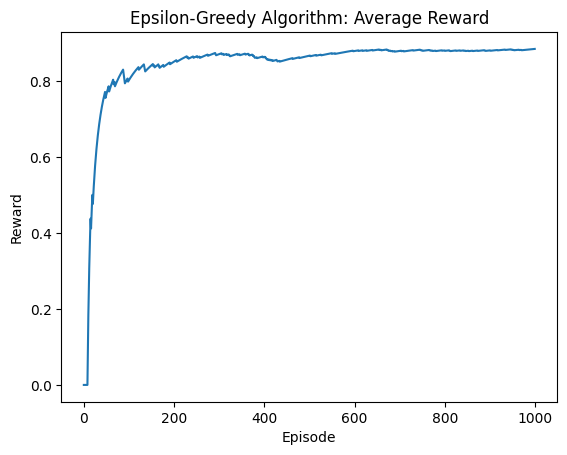

<BarContainer object of 10 artists>

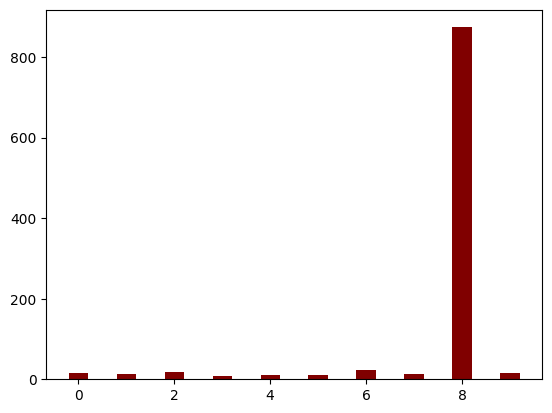

In [ ]:
import matplotlib.pyplot as plt

# Create Multi-Arm Bandit object with 'n' number of Arms
no_arms = 10
num_episodes = 1000
bandits = AdvertisingBandit(no_arms)

# Instantiate and run the EpsilonGreedy class
epsilon_greedy_bandit = EpsilonGreedy(bandits, epsilon=0.1)
Q_Values, Num_pulls, rewards = epsilon_greedy_bandit.run(num_episodes)

# Calculate the exploration and exploitation counts
num_random_pulls = int(epsilon_greedy_bandit.epsilon * num_episodes)
num_greedy_pulls = num_episodes - num_random_pulls

# Evaluate Epsilon-Greedy algorithm
# 1. Average Rewards
# Calculate the average reward over all arms
average_reward = np.mean(rewards)
print("Average Reward:", average_reward)

# 2. exploration-exploitation ratio
# Calculate the exploration-exploitation ratio
exploration_exploitation_ratio = num_random_pulls / num_greedy_pulls # if num_greedy_pulls > 0 else float('inf')
print("Exploration-Exploitation Ratio:", exploration_exploitation_ratio)

# 3. Average reward overtime
# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards) / np.arange(1, num_episodes+1))
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Epsilon-Greedy Algorithm: Average Reward")
plt.show()

# Plot Rewards and Arm Pulls
arms = list(range(0, no_arms))
plt.bar(arms, Num_pulls, color ='maroon', width = 0.4)


##### For function based Implementation

Average Reward: 0.923
Exploration-Exploitation Ratio: 0.0989010989010989


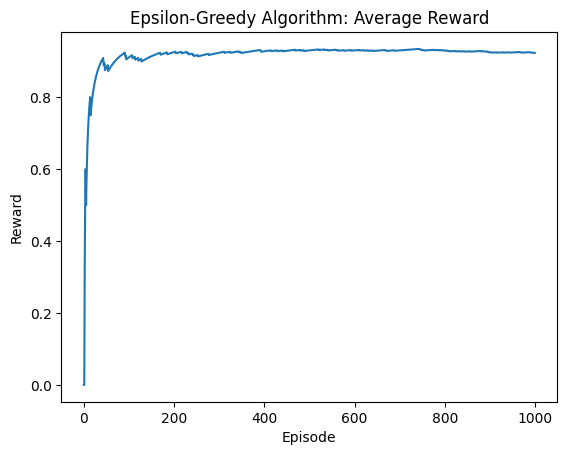

<BarContainer object of 10 artists>

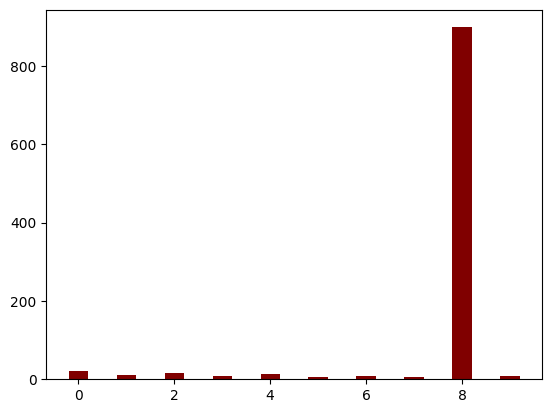

In [ ]:
import matplotlib.pyplot as plt

# Testing Epsilon Greedy implementation
# Create Multi-Arm Bandit object with 'n' number of Arms
no_arms = 10
num_episodes = 1000
bandits = AdvertisingBandit(no_arms)

# Execute epsilon_greedy algorithm
Q_Values, Num_pulls, rewards, num_random_pulls, num_greedy_pulls = epsilon_greedy(bandits, num_episodes, epsilon=0.1)

# Evaluate Epsilon-Greedy algorithm
# 1. Average Rewards
# Calculate the average reward over all arms
average_reward = np.mean(rewards)
print("Average Reward:", average_reward)

# 2. exploration-exploitation ratio
# Calculate the exploration-exploitation ratio
exploration_exploitation_ratio = num_random_pulls / num_greedy_pulls #if num_greedy_pulls > 0 else float('inf')
print("Exploration-Exploitation Ratio:", exploration_exploitation_ratio)

# 3. Average reward overtime
# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards) / np.arange(1, num_episodes+1))
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Epsilon-Greedy Algorithm: Average Reward")
plt.show()

# Plot Rewards and Arm Pulls
arms = list(range(0, no_arms))
plt.bar(arms, Num_pulls, color ='maroon',
        width = 0.4)


## Part 3a: Upper Confidence Bound (UCB) Algorithm

Fill in the missing parts in the code below to implement the UCB algorithm.


##### Class Based Implementation

In [ ]:
class UCB:
    def __init__(self, bandit):
        self.bandit = bandit
        self.num_arms = len(bandit.true_ctrs)
        self.Q_Values = np.zeros(self.num_arms)
        self.Num_pulls = np.zeros(self.num_arms)

    def select_arm(self, step):
        ucb_values = self.Q_Values + np.sqrt(2 * np.log(step + 1) / (self.Num_pulls + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.Num_pulls[chosen_arm] += 1
        self.Q_Values[chosen_arm] += (1 / self.Num_pulls[chosen_arm]) * (reward - self.Q_Values[chosen_arm])

    def run(self, num_episodes):
        rewards = []
        for step in range(num_episodes):
            chosen_arm = self.select_arm(step)
            reward = self.bandit.pull(chosen_arm)
            rewards.append(reward)
            self.update(chosen_arm, reward)
        return self.Q_Values, self.Num_pulls, rewards


##### Function based Implementation

In [ ]:
def ucb(bandit, num_episodes):
    """
    Upper Confidence Bound (UCB) algorithm for the multi-armed bandit problem.

    Parameters:
        bandit (Object): The Multi-Arm Bandit object which is to be used
        num_episodes (int): Number of episodes to run the simulation

    Returns:
        Q_Values (list): The estimated rewards for each arm after the simulation.
        Num_pulls: Number of times each arm is pulled
        rewards: List of rewards received over the episodes
    """
    num_arms = len(bandit.true_ctrs)  # Determine number of arms from the bandit object

    # Initialize Q_Values and Num_pulls matrices to Zero
    Q_Values = np.zeros(num_arms)
    Num_pulls = np.zeros(num_arms)
    rewards = []

    # Run Episodes and find rewards
    for step in range(num_episodes):
        # Compute UCB values for each arm
        ucb_values = Q_Values + np.sqrt(2 * np.log(step + 1) / (Num_pulls + 1e-5))

        # Select the arm with the highest UCB value
        chosen_arm = np.argmax(ucb_values)

        # Pull the chosen arm and receive the reward
        reward = bandit.pull(chosen_arm)  # Assuming the pull method is named 'pull'

        # Store cumulative reward for plotting
        rewards.append(reward)
        Num_pulls[chosen_arm] += 1  # Increase the chosen Arm Count
        Q_Values[chosen_arm] += (1 / Num_pulls[chosen_arm]) * (reward - Q_Values[chosen_arm])  # Update Q_Values for the chosen Arm

    return Q_Values, Num_pulls, rewards


### Part 3b: Test and evaluate UCB Algorithm

##### For Class Based Implementation

Average Reward: 0.848


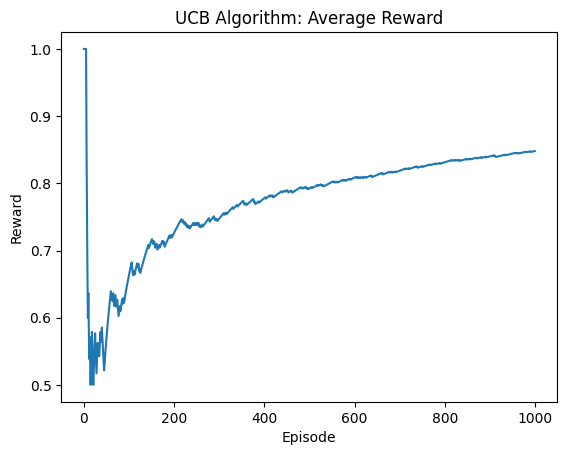

<BarContainer object of 10 artists>

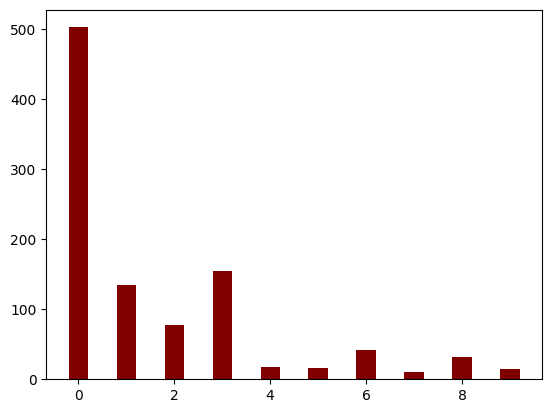

In [ ]:
import matplotlib.pyplot as plt

# Create Multi-Arm Bandit object with 'n' number of Arms
no_arms = 10
num_episodes = 1000
bandits = AdvertisingBandit(no_arms)

# Instantiate and run the UCB class
ucb_bandit = UCB(bandits)
estimated_rewards, no_arm_pulls, rewards = ucb_bandit.run(num_episodes)

# Evaluate UCB algorithm
# 1. Average Rewards
# Calculate the average reward over all arms
average_reward = np.mean(rewards)
print("Average Reward:", average_reward)

# 2. Average reward overtime
# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards) / np.arange(1, num_episodes+1))
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("UCB Algorithm: Average Reward")
plt.show()

# Plot Rewards and Arm Pulls
arms = list(range(0, no_arms))
plt.bar(arms, no_arm_pulls, color ='maroon', width = 0.4)


##### For Function Based Implementation

Average Reward: 0.651


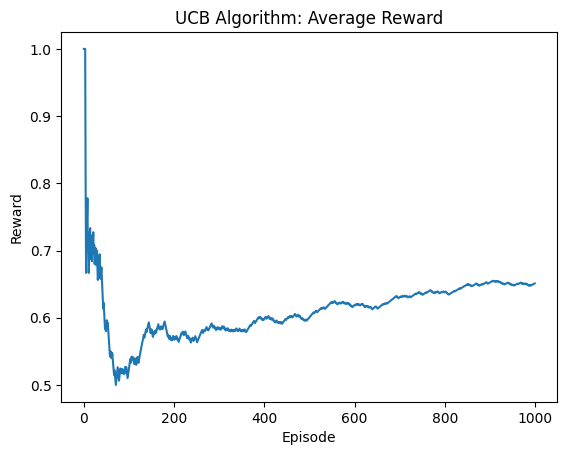

<BarContainer object of 10 artists>

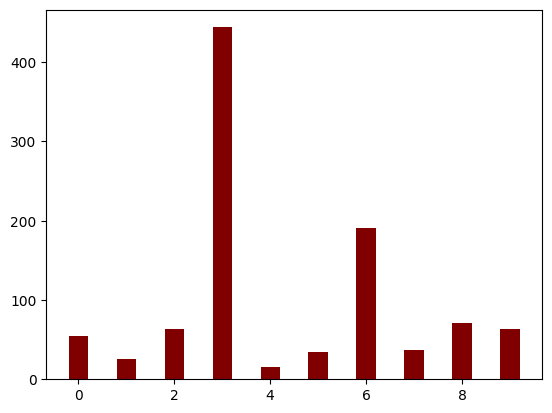

In [ ]:
import matplotlib.pyplot as plt
# Testing UCB algorithm implementation
# Create Multi-Arm Bandit object with 'n' number of Arms
no_arms = 10
num_episodes = 1000
bandits = AdvertisingBandit(no_arms)

estimated_rewards, no_arm_pulls, rewards = ucb(bandits, num_episodes)

# Evaluate Epsilon-Greedy algorithm
# 1. Average Rewards
# Calculate the average reward over all arms
average_reward = np.mean(rewards)
print("Average Reward:", average_reward)


# 2. Average reward overtime
# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards) / np.arange(1, num_episodes+1))
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("UCB Algorithm: Average Reward")
plt.show()

# Plot Rewards and Arm Pulls
arms = list(range(0, no_arms))
plt.bar(arms, no_arm_pulls, color ='maroon',
        width = 0.4)

## Part 4: Comparing Epsilon-Greedy and UCB

Finally, we'll compare the performance of the epsilon-greedy and UCB algorithms. One common metric is the average reward over time.

##### For Class Based

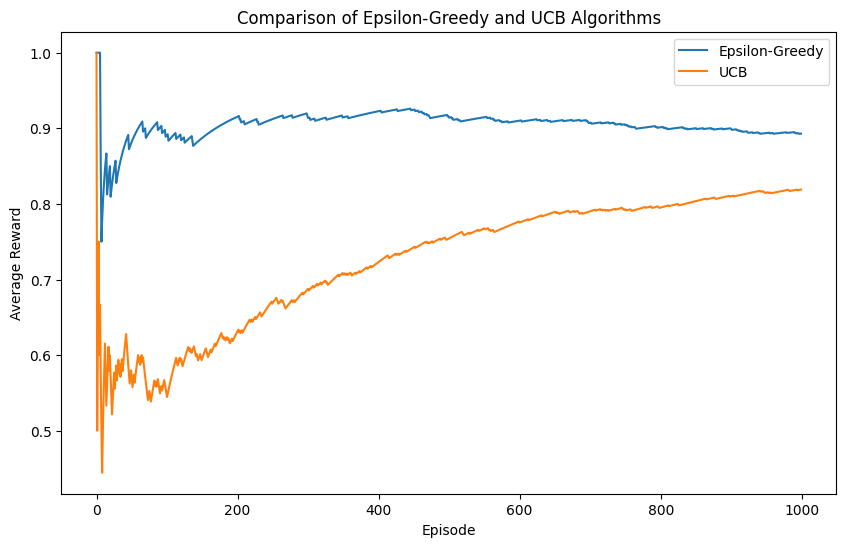

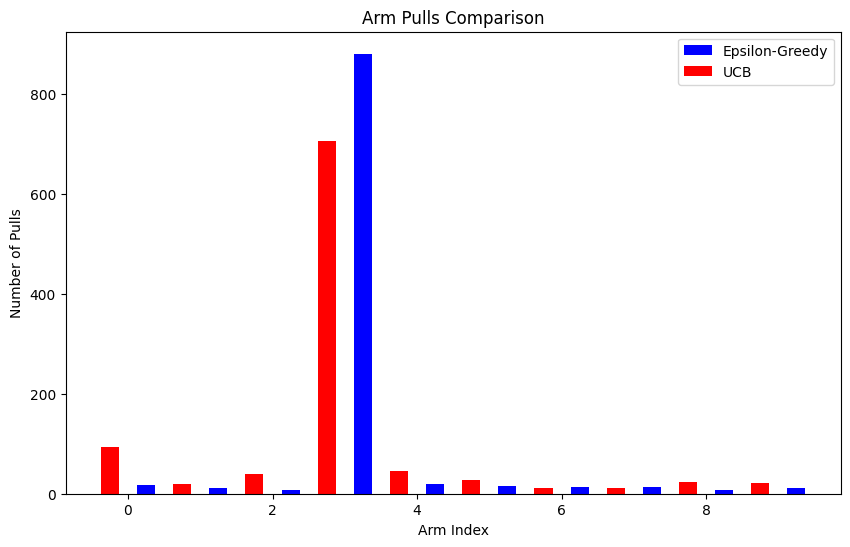

In [ ]:
import matplotlib.pyplot as plt

# Setup the Multi-Arm Bandit problem
num_episodes = 1000
no_arms = 10
bandits = AdvertisingBandit(no_arms)

# Instantiate and run the EpsilonGreedy class
epsilon_greedy_bandit = EpsilonGreedy(bandits, epsilon=0.1)
Q_Values, Num_pulls, rewards_epsilon_greedy = epsilon_greedy_bandit.run(num_episodes)

# Calculate the exploration and exploitation counts for EpsilonGreedy
num_random_pulls = int(epsilon_greedy_bandit.epsilon * num_episodes)
num_greedy_pulls = num_episodes - num_random_pulls

# Instantiate and run the UCB class
ucb_bandit = UCB(bandits)
estimated_rewards, no_arm_pulls, rewards_ucb = ucb_bandit.run(num_episodes)

# Plot Average reward over episodes/time
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(rewards_epsilon_greedy) / np.arange(1, num_episodes+1), label='Epsilon-Greedy')
plt.plot(np.cumsum(rewards_ucb) / np.arange(1, num_episodes+1), label='UCB')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Comparison of Epsilon-Greedy and UCB Algorithms')
plt.show()

# Plot Arm Pulls for both algorithms
width = 0.25
arms = np.arange(no_arms)
plt.figure(figsize=(10,6))
plt.bar(arms + width, Num_pulls, width, label='Epsilon-Greedy', color='blue')
plt.bar(arms - width, no_arm_pulls, width, label='UCB', color='red')
plt.legend()
plt.xlabel('Arm Index')
plt.ylabel('Number of Pulls')
plt.title('Arm Pulls Comparison')
plt.show()


##### For Function Based Implementation

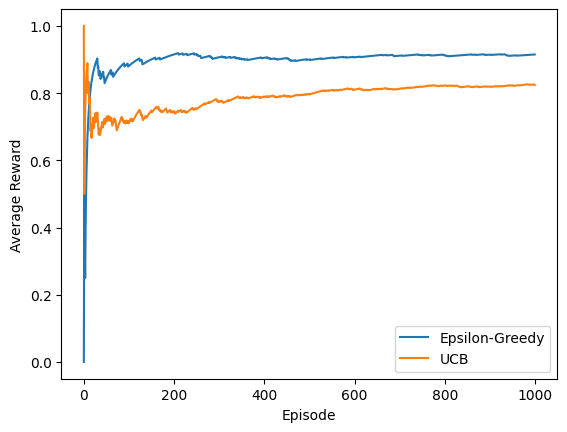

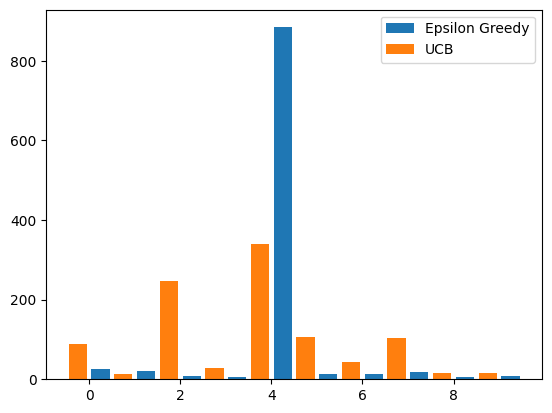

In [ ]:
import matplotlib.pyplot as plt
# Setup the Multi-Arm Bandit problem
num_episodes=1000
no_arms = 10
bandits = AdvertisingBandit(no_arms)

# Run Epsilon-Greedy and UCB Algorithms on same Multi-Arm Bandit problem
Q_Values, Num_pulls, rewards_epsilon_greedy, num_random_pulls, num_greedy_pulls = epsilon_greedy(bandits, num_episodes, epsilon=0.1)
estimated_rewards, no_arm_pulls, rewards_ucb = ucb(bandits, num_episodes)

# Plot Average reward over episodes/time
plt.plot(np.cumsum(rewards_epsilon_greedy) / np.arange(1, num_episodes+1), label='Epsilon-Greedy')
plt.plot(np.cumsum(rewards_ucb) / np.arange(1, num_episodes+1), label='UCB')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.show()

# Plot Arm Pulls for both algorithms
width = 0.25
arms = np.arange(no_arms)
plt.bar(arms + width, Num_pulls, 0.4, label = 'Epsilon Greedy')
plt.bar(arms - width, no_arm_pulls, 0.4, label = 'UCB')
plt.legend()


You'll see the average reward over time for both the epsilon-greedy and UCB algorithms. This will show you which algorithm performs better on this particular bandit problem. Remember, the best algorithm can change based on the bandit problem and the specific parameters used, so it's important to try different approaches and adjust the parameters as needed.